In [1]:
!pip install sqlalchemy
!pip install pyodbc

In [2]:
import pandas as pd
import sqlalchemy

In [3]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        assert user, 'You must define a username'
        assert password, 'You must define a password'
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)

In [5]:
engine = new_engine('mssql', 'LAPTOP-U3795DN8', 'AdventureWorks2022')

mssql://LAPTOP-U3795DN8/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [6]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [7]:
connection = engine.connect()

In [8]:
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [ ]:
# in this section we are trying the pattern of color and orderQty.

In [9]:
# Silver color 

multijoin_sql ="""
SELECT TOP (100) PERCENT
    P.ProductID,
    P.Color,
    S.OrderQty
FROM
    Production.Product AS P
INNER JOIN
    Sales.SalesOrderDetail AS S ON P.ProductID = S.ProductID
WHERE
    P.Color = N'silver'
ORDER BY
    S.OrderQty DESC;
    """
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [10]:
join_df.head()

,ProductID,Color,OrderQty
0,880,Silver,20
1,880,Silver,20
2,880,Silver,20
3,880,Silver,17
4,880,Silver,17


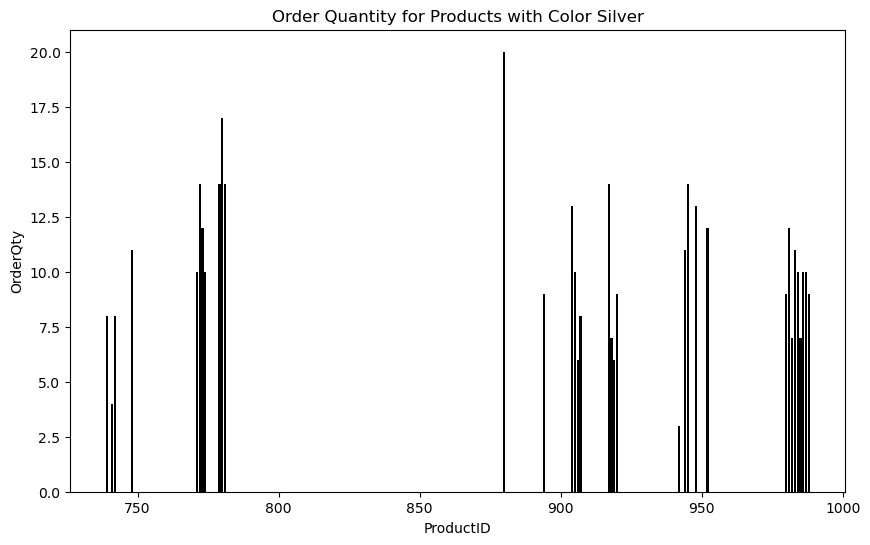

In [11]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(join_df['ProductID'], join_df['OrderQty'], color='black')
plt.xlabel('ProductID')
plt.ylabel('OrderQty')
plt.title('Order Quantity for Products with Color Silver')
plt.show()

In [12]:
# multi color(least preferred)

multijoin_sql ="""
SELECT TOP (100) PERCENT
    P.ProductID,
    P.Color,
    S.OrderQty
FROM
    Production.Product AS P
INNER JOIN
    Sales.SalesOrderDetail AS S ON P.ProductID = S.ProductID
WHERE
    P.Color = N'multi'
ORDER BY
    S.OrderQty DESC;
      """
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [13]:
join_df.head()

,ProductID,Color,OrderQty
0,715,Multi,32
1,712,Multi,27
2,712,Multi,25
3,712,Multi,24
4,715,Multi,23


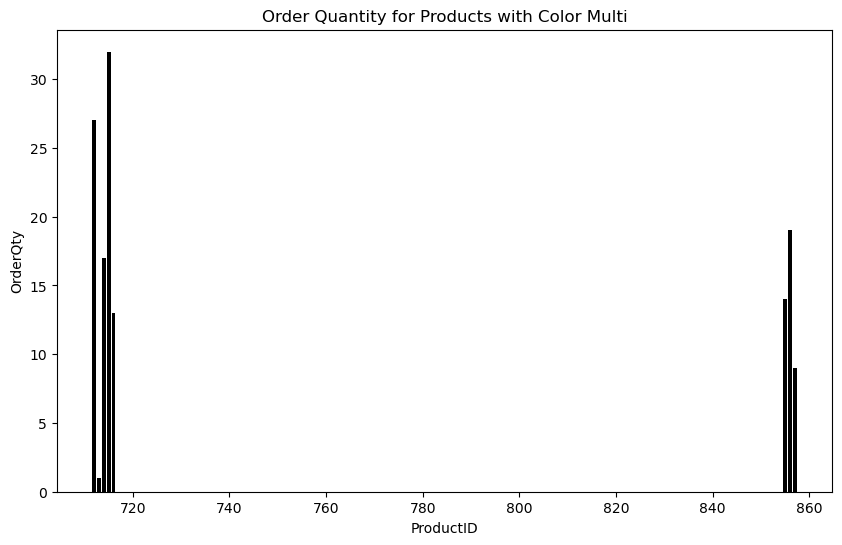

In [14]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(join_df['ProductID'], join_df['OrderQty'], color='black')
plt.xlabel('ProductID')
plt.ylabel('OrderQty')
plt.title('Order Quantity for Products with Color Multi')
plt.show()

In [ ]:
# Yellow color (moderatly good)

multijoin_sql ="""
SELECT TOP (100) PERCENT
    P.ProductID,
    P.Color,
    S.OrderQty
FROM
    Production.Product AS P
INNER JOIN
    Sales.SalesOrderDetail AS S ON P.ProductID = S.ProductID
WHERE
    P.Color = N'yellow'
ORDER BY
    S.OrderQty DESC;
    """
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [15]:
join_df.head()

,ProductID,Color,OrderQty
0,715,Multi,32
1,712,Multi,27
2,712,Multi,25
3,712,Multi,24
4,715,Multi,23


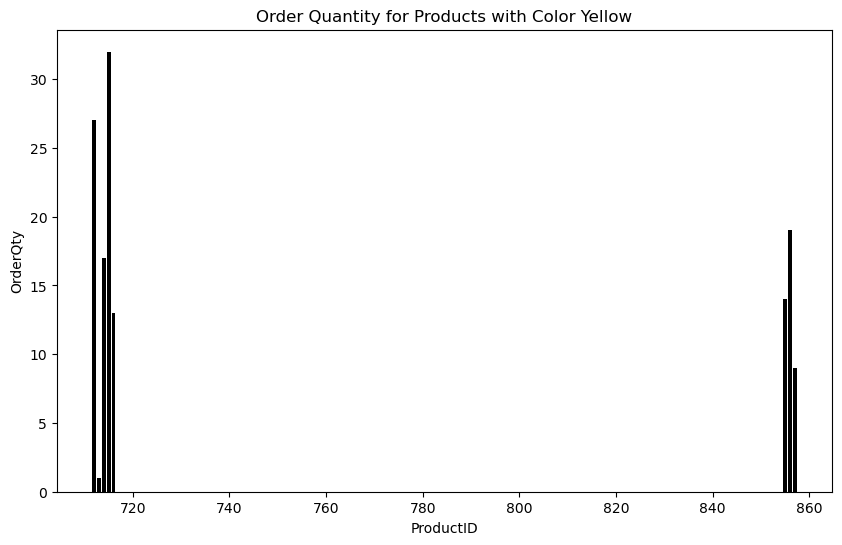

In [16]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(join_df['ProductID'], join_df['OrderQty'], color='black')
plt.xlabel('ProductID')
plt.ylabel('OrderQty')
plt.title('Order Quantity for Products with Color Yellow')
plt.show()

In [ ]:
# White color approach(last)

multijoin_sql ="""
SELECT TOP (100) PERCENT
    P.ProductID,
    P.Color,
    S.OrderQty
FROM
    Production.Product AS P
INNER JOIN
    Sales.SalesOrderDetail AS S ON P.ProductID = S.ProductID
WHERE
    P.Color = N'white'
ORDER BY
    S.OrderQty DESC;

"""
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [17]:
join_df.head()

,ProductID,Color,OrderQty
0,715,Multi,32
1,712,Multi,27
2,712,Multi,25
3,712,Multi,24
4,715,Multi,23


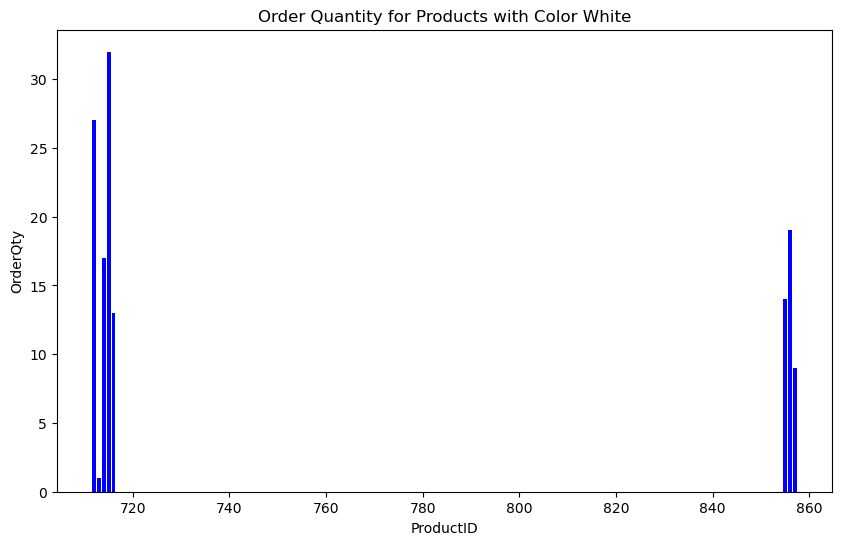

In [18]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(join_df['ProductID'], join_df['OrderQty'], color='blue')
plt.xlabel('ProductID')
plt.ylabel('OrderQty')
plt.title('Order Quantity for Products with Color White')
plt.show()

In [ ]:
# Black color approach (in most preferred)

multijoin_sql ="""
SELECT TOP (100) PERCENT
    P.ProductID,
    P.Color,
    S.OrderQty
FROM
    Production.Product AS P
INNER JOIN
    Sales.SalesOrderDetail AS S ON P.ProductID = S.ProductID
WHERE
    P.Color = N'black'
ORDER BY
    S.OrderQty DESC;

"""
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [19]:
join_df.head()

,ProductID,Color,OrderQty
0,715,Multi,32
1,712,Multi,27
2,712,Multi,25
3,712,Multi,24
4,715,Multi,23


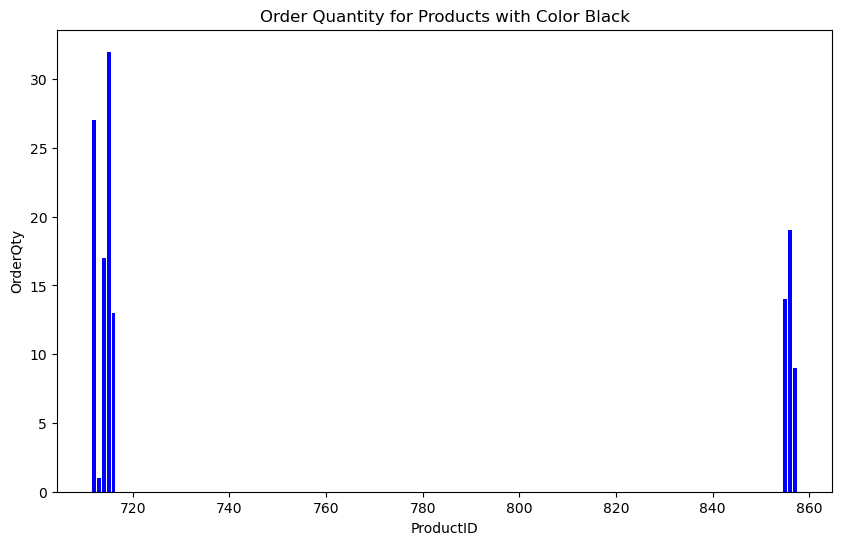

In [20]:
# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(join_df['ProductID'], join_df['OrderQty'], color='blue')
plt.xlabel('ProductID')
plt.ylabel('OrderQty')
plt.title('Order Quantity for Products with Color Black')
plt.show()

In [21]:
#  trying to establish a relationship b/n orderqty and listprice
multijoin_sql ="""
SELECT Production.Product.ProductID,
Production.Product.Name, 
Production.Product.color, 
Production.Product.ListPrice,
Sales.SalesOrderDetail.CarrierTrackingNumber, 
Sales.SalesOrderDetail.OrderQty
FROM   Production.Product INNER JOIN
             Sales.SalesOrderDetail ON Production.Product.ProductID = Sales.SalesOrderDetail.ProductID
"""
join_df = pd.read_sql(sql=multijoin_sql, con=connection)

In [22]:
join_df.head()

,ProductID,Name,color,ListPrice,CarrierTrackingNumber,OrderQty
0,776,"Mountain-100 Black, 42",Black,3374.99,4911-403C-98,1
1,777,"Mountain-100 Black, 44",Black,3374.99,4911-403C-98,3
2,778,"Mountain-100 Black, 48",Black,3374.99,4911-403C-98,1
3,771,"Mountain-100 Silver, 38",Silver,3399.99,4911-403C-98,1
4,772,"Mountain-100 Silver, 42",Silver,3399.99,4911-403C-98,1


In [23]:
 OrderQty=join_df.OrderQty

In [24]:
ci = stats.norm.interval(0.95, loc=np.mean(OrderQty), scale=stats.sem(OrderQty))

print(f"Confidence Interval for Average OrderQty: {ci}")

Confidence Interval for Average OrderQty: (2.252060765047477, 2.280098783902794)


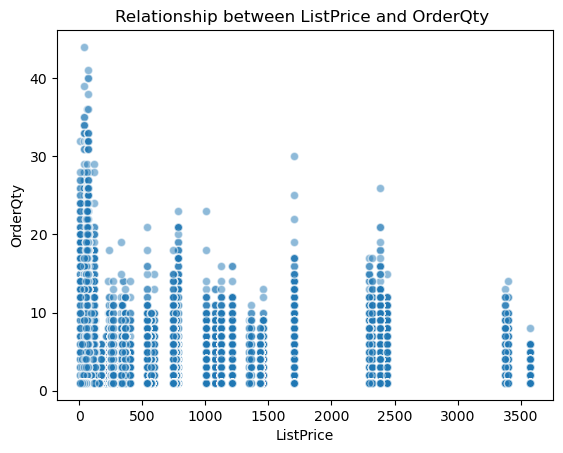

In [25]:
# Plot a scatter plot
plt.scatter(join_df['ListPrice'], join_df['OrderQty'], alpha=0.5, edgecolors='w')
plt.xlabel('ListPrice')
plt.ylabel('OrderQty')
plt.title('Relationship between ListPrice and OrderQty ')
plt.show()